# Table of Contents
 <p><div class="lev3"><a href="#Sample-non-planar-curve---ready-to-use"><span class="toc-item-num">0.0.1&nbsp;&nbsp;</span>Sample non-planar curve - ready to use</a></div><div class="lev1"><a href="#Planar-Curves"><span class="toc-item-num">1&nbsp;&nbsp;</span>Planar Curves</a></div>

In [1]:
# Latest version curve generation helper functions
import numpy as np
import scipy as sp
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator
from matplotlib import cm
from scipy.interpolate import splprep, splev




n_planar_curves_list = []
planar_curves_list = []

### Sample non-planar curve - ready to use

In [2]:
# Non-planar curve example
# X = [0.72216999999999998, 0.70216999999999996, 0.68217000000000005, 0.66217000000000004, 0.64217000000000002, 0.62217, 0.60216999999999998, 0.58216999999999997, 0.56216999999999995, 0.54217000000000004, 0.52217000000000002, 0.50217000000000001]
# Y = [0.67586000000000002, 0.67613000000000001, 0.67606999999999995, 0.67579999999999996, 0.67525000000000002, 0.67564999999999997, 0.67596999999999996, 0.67586000000000002, 0.67571000000000003, 0.67598000000000003, 0.67581999999999998, 0.67615000000000003]
# Z = [-0.14727000000000001, -0.14729, -0.14724000000000001, -0.14706, -0.14709, -0.14727999999999999, -0.14731, -0.14735999999999999, -0.14731, -0.14732000000000001, -0.14729, -0.14724999999999999]

In [3]:

def random_three_vector_sphere_1(r = 5):
    """
    Generates a random 3D unit vector (direction) with a uniform spherical distribution
    Algo from http://stackoverflow.com/questions/5408276/python-uniform-spherical-distribution
    :return:
    """
    phi = np.random.uniform(0,np.pi*2)
    costheta = np.random.uniform(-1,1)

    theta = np.arccos( costheta )
    x = np.sin( theta) * np.cos( phi )
    y = np.sin( theta) * np.sin( phi )
    z = np.cos( theta )
    return (round(x,r), round(y,r), round(z,r))

def random_three_vector_sphere_2(cx = 0 , cy = 0, cz = 0, radius = 1, restrict = False, r = 5):
    """
    Generates a random 3D unit vector (direction) with a uniform spherical distribution
    Algo from http://mathworld.wolfram.com/SpherePointPicking
    :return:
    """
    if (restrict == True) :
       U = np.random.uniform(0.495,0.505)
       V = np.random.uniform(0.505,0.495)
    else :    
       U = np.random.uniform(0,1)
       V = np.random.uniform(0,1)
    
    theta = np.pi*2*U
    cosphi = 2*V - 1

    phi = np.arccos( cosphi )
    x = np.sin( phi ) * np.cos( theta )
    y = np.sin( phi ) * np.sin( theta )
    z = np.cos( phi )
    return (round(x*radius+cx,r),round(y*radius+cy,r),round(z*radius+cz,r))

def random_next_vertix(px ,py, pz, delta = 0.001):
    cx = 1 
    cy = 1 
    cz = 1 
    r = 1
    max_trial = 10000
    alt_values_tested = 0

    nx, ny, nz = random_three_vector_sphere_2(px, py, pz, delta, True)
    d = math.sqrt((nx-cx)**2 + (ny-cy)**2 + (nz-cz)**2)

    while ((d > r) & (alt_values_tested < max_trial)) :
        #print("distance d: ", d, " is greater than r: ", r)
        tx, ty, tz = random_three_vector_sphere_2(nx, ny, nz, delta, True)
        d = math.sqrt((tx-cx )**2 + (ty-cy)**2 + (tz-cz)**2)   
        alt_values_tested += 1
 
    #print("accepted distance d: ", d, " is less than r: ", r)

    if(alt_values_tested > 0) :
        return tx,ty,tz
    
    if(alt_values_tested >= max_trial) :
        print("max trial reached: ", alt_values_tested)
        return 0,0,0
    
    return nx, ny, nz

In [45]:
def plot_curve(pts, x_new, y_new, z_new):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(pts[0], pts[1], pts[2], 'ro')
    ax.plot(x_new, y_new, z_new, 'b--')
    plt.show()    

# Spline Generation
def spline_generate(pts):
    tck, u = splprep(pts, u=None, s=0.0) 
    u_new = np.linspace(u.min(), u.max(), 300)
    x_new, y_new, z_new = splev(u_new, tck, der=0)
    return x_new, y_new, z_new
    
# Restructure for Spline Processing 
def get_3d_points(X,Y,Z):
    pts = np.concatenate((X,Y,Z), axis=0)
    pts = pts.reshape(3,len(X))
    return pts

def non_planar_curve_generate():
    # Non-Planar Curve Generation
    X = []
    Y = []
    Z = []

    delta = 0.01
    n = 10

    #first vertix on unit sphere
    x1,y1,z1 = random_three_vector_sphere_2()
    #print("first point (x1 y1 z1): ", x1, y1, z1)
    X.append(x1)
    Y.append(y1)
    Z.append(z1)

    xs,ys,zs = random_next_vertix(x1,y1,z1,delta)
    #print("second point: ", xs, ys, zs)
    X.append(xs)
    Y.append(ys)
    Z.append(zs)

    for i in range(n):
        nx,ny,nz = random_next_vertix(xs,ys,zs,delta)
        #print(nx, ny, nz)
        if (nx == ny == nz == 0):
            print("FAIL")
            break 
        xs = nx
        ys = ny
        zs = nz
        X.append(xs)
        Y.append(ys)
        Z.append(zs)

    #print(X,Y,Z)
    return X,Y,Z

def add_to_curve_list(x, y, z, curvelist):
    inputs = np.concatenate((x,y,z), axis=0)
    len(inputs)
    inputs = inputs.reshape(3,300)
    n_planar_x = inputs[0]
    n_planar_y = inputs[1]
    n_planar_z = inputs[2]
    curvelist.append(inputs)
    print(len(curvelist))
    
def n_planar_curve_generate(n):
    for i in range(n):
        x,y,z = non_planar_curve_generate()
        pts = get_3d_points(x,y,z)
        X, Y, Z = spline_generate(pts)
        #plot_curve(pts, X,Y,Z)
        add_to_curve_list(X, Y, Z, n_planar_curves_list)    

In [5]:
n_planar_curve_generate(100)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


# Planar Curves

In [50]:
def planar_curve_generate():
    # Planar Curve Generation
    X = []
    Y = []
    Z = []

    delta = 0.001
    n = 20

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    #a random vertix on unit sphere
    x1,y1,z1 = random_three_vector_sphere_2(0,0,0,1,False,5)
    print("First random point: ", x1, y1, z1)
    x2,y2,z2 = random_three_vector_sphere_2(0,0,0,1,False,5)
    print("Second random point: ", x2, y2, z2)
    X.append(x1)
    Y.append(y1)
    Z.append(z1)

    #find a plane passing through this point perpendicular 
    #to line from center to this point
    from sympy import Point3D
    from sympy.geometry.plane import Plane
    from sympy.abc import t
    p = Plane(Point3D(0,0,0), Point3D(x1,y1,z1), Point3D(x2,y2,z2))
    print("plane p:", p)
    next_point = p.arbitrary_point(t)
    print("next point:", next_point)
    angle=0

    for i in range(n):
        angle += np.pi*2*np.random.uniform(0,1)
        print("angle: ", angle)
        temp_x = next_point.x.simplify().evalf(subs={t: angle})
        xs = round(temp_x,7)
        ys = round(next_point.y.simplify().evalf(subs={t: angle}),7)
        zs = round(next_point.z.simplify().evalf(subs={t: angle}),7)
        X.append((xs))
        Y.append((ys))
        Z.append((zs))
        print("xs, ys, zs: ", xs,ys,zs)
        p = Plane(Point3D(xs,ys,zs) , Point3D(0,0,0), Point3D(x1,y1,z1))
        #print("next plane p:", p)
        next_point = p.arbitrary_point(t)
        #print("next point:", next_point)

    #print(X,Y,Z)
    return X,Y,Z

def planar_curves_generate(n):
    for i in range(n):
        x,y,z = planar_curve_generate()
        pts = get_3d_points(x,y,z)
        X, Y, Z = spline_generate(pts)
        #plot_curve(pts, X,Y,Z)
        add_to_curve_list(X, Y, Z, planar_curves_list) 

('First random point: ', -0.27463, -0.37941, 0.88353)
('Second random point: ', 0.96022, -0.10873, -0.25721)
('plane p:', Plane(Point3D(0, 0, 0), (193654263/1000000000, 7777455943/10000000000, 3941775901/10000000000)))
('next point:', Point3D(387308526*sqrt(1595532311136353959)*(7777455943*sin(t) + 1936542630*cos(t))*sqrt(1/(-30122749973132700180*sin(2*t) + 56738623587498702349*cos(2*t) + 95314212810522059751))/1595532311136353959 - 10*sqrt(1595532311136353959)*sqrt(1/(-30122749973132700180*sin(2*t) + 56738623587498702349*cos(2*t) + 95314212810522059751))*cos(t), 7777455943*sqrt(1595532311136353959)*(7777455943*sin(t) + 1936542630*cos(t))*sqrt(1/(-30122749973132700180*sin(2*t) + 56738623587498702349*cos(2*t) + 95314212810522059751))/7977661555681769795 - 10*sqrt(1595532311136353959)*sqrt(1/(-30122749973132700180*sin(2*t) + 56738623587498702349*cos(2*t) + 95314212810522059751))*sin(t), 3941775901*sqrt(1595532311136353959)*(7777455943*sin(t) + 1936542630*cos(t))*sqrt(1/(-3012274997313270

ValueError: Enter three non-collinear points

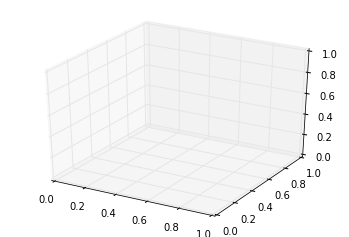

In [51]:
planar_curves_generate(10)

In [159]:
# Planar curve example
# Planar_X_Core = [-0.48204000000000002, -0.4816193, -0.2405249, -0.4996361, -0.5509887, -0.5245034, -0.9289706, -1.29355, -1.0366633, -1.3995084, -1.6002441, -1.9593839, -2.2140134, -2.4168069, -2.5160681, -2.4326647, -2.747707, -2.7940115, -3.1366136, -3.0744444, -3.5192517] 
# Planar_Y_Core = [-0.41771000000000003, -0.2066122, -0.8570144, -1.8143113, -2.7743838, -3.6873043, -4.4663092, -5.3195221, -5.9414197, -6.7972744, -7.7768981, -8.638261, -9.5979985, -10.5771616, -11.5541371, -12.4172729, -13.3319778, -14.2897243, -15.173574, -16.0568172, -16.719394]
# Planar_Z_Core = [-0.77017000000000002, -0.8516773, -0.1313645, -0.2595987, 0.0153988, 0.422676, -0.0564458, -0.4294199, 0.3103453, -0.0582414, -0.0647739, -0.4240405, -0.5426479, -0.5533433, -0.3644888, 0.1335478, -0.1195594, 0.1643024, -0.1541837, 0.3105919, -0.2920178]

In [160]:
# Restructure for Spline Processing 
pts2 = np.concatenate((Planar_X_Core,Planar_Y_Core,Planar_Z_Core), axis=0)
pts2.shape
pts2 = pts2.reshape(3,21)

In [162]:
inputs = np.concatenate((x_new,y_new,z_new), axis=0)
len(inputs)
inputs = inputs.reshape(3,300)
planar_x = inputs[0]
planar_y = inputs[1]
planar_z = inputs[2]

In [15]:
def add_noise(inputs, mean, std_dev):
    result = map(lambda x: x + np.random.normal(mean,std_dev,x.shape), inputs)
    return list(result)

In [16]:
#ax.plot(x, y, z, 'ro')
ax.plot(add_noise(x, 0, 0.01), add_noise(y, 0, 0.01), add_noise(z, 0, 0.01), 'b--')
plt.show()

In [8]:
''' This is a 2-layer Auto-encoder network
'''
from __future__ import division, print_function, absolute_import

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator
from matplotlib import cm


# Parameters
learning_rate = 0.1
training_epochs = 200
batch_size = 100 # 300x 300y 300z
display_step = 10
examples_to_show = 1
total_batch = 10

# Network Parameters
n_hidden_1 = 50 # 1st layer num features
n_hidden_2 = 25 # 1st layer num features
n_input = 900 # (300x 300y 300z points on a curve)

# tf Graph input (only pictures)
X = tf.placeholder("float", [None, n_input])

weights = {
    'encoder_h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'encoder_h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'decoder_h1': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_1])),
    'decoder_h2': tf.Variable(tf.random_normal([n_hidden_1, n_input])),
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'encoder_b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'decoder_b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'decoder_b2': tf.Variable(tf.random_normal([n_input])),
}


# Building the encoder
def encoder(x):
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']),
                                   biases['encoder_b1']))
    # Decoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']),
                                   biases['encoder_b2']))
    return layer_2

# Building the decoder
def decoder(x):
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']),
                                   biases['decoder_b1']))
    # Decoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']),
                                   biases['decoder_b2']))
    return layer_2



# Construct model
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

# Prediction
y_pred = decoder_op
# Targets (Labels) are the input data.
y_true = X

# Define loss and optimizer, minimize the squared error
cost = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

# Initializing the variables
init = tf.initialize_all_variables()


# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        # Loop over all batches
        start_idx = 0
        step = (start_idx + n_input/3) * batch_size
            
        for j in range(total_batch):
            batch_all = []
            for i in range(batch_size):
                batch_x = (np.concatenate((add_noise(x, 0, 9e-8),
                                    add_noise(y, 0, 9e-8),
                                    add_noise(z, 0, 9e-8)), 
                                      axis=0))
                batch_all.append(batch_x)
            batch_xs = np.asarray(batch_all)    
            # Run optimization op (backprop) and cost op (to get loss value)
            _, c = sess.run([optimizer, cost], feed_dict={X: batch_xs})
            start_idx += step
            #end_idx = (start_idx + n_input/3) * batch_size
        # Display logs per epoch step
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1),
                  "cost=", "{:.9f}".format(c))

    print("Optimization Finished!")

    # Applying encode and decode over test set
    
    test_input = batch_xs[0].reshape(1, n_input)
    
    input_curve = test_input.reshape(3, n_input/3)
    
    encode_decode = sess.run(
        y_pred, feed_dict={X: test_input})

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')           
    
    #print("input_curve", input_curve)                         
    output_curve = np.reshape(encode_decode[0], (3, n_input/3))
    #print("output_curve", output_curve)           
    
    min = np.amin(input_curve, axis=1)
    max = np.amax(input_curve, axis=1)
    
    # now weed out outliers
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')  
    ax.plot(input_curve[0], input_curve[1], input_curve[2], 'r--')
    ax.plot(output_curve[0], output_curve[1], output_curve[2], 'b--')
    #ax.plot(np.clip(output_curve[0], min[0], max[0]), np.clip(output_curve[1], min[1], max[1]), np.clip(output_curve[2], min[2], max[2]), 'bo')
    plt.show()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


Instructions for updating:
Use `tf.global_variables_initializer` instead.


NameError: name 'add_noise' is not defined

In [59]:
print("input curve means: ", np.mean(input_curve, axis=1))
print("output curve means: ", np.mean(output_curve, axis=1))
print("diff in means: ", np.mean(input_curve, axis=1) - np.mean(output_curve, axis=1))
print("input curve sd: ", np.std(input_curve, axis=1))
print("output curve sd = ",np.std(output_curve, axis=1))


input curve means:  [-2.38334212  3.34328931  0.04419736]
output curve means:  [ 0.00746523  0.8482675   0.15571655]
diff in means:  [-2.39080735  2.49502182 -0.11151919]
input curve sd:  [ 1.51628653  2.3639813   0.32698058]
output curve sd =  [ 0.03934498  0.33599135  0.22059652]


In [7]:
#Step autoencoder
_debug_verbose = False

class AutoEncoder(object):
    def __init__(self, arch):        
        self.num_layers = len(arch)
        self.input_layer_size = arch[0]
        self.output_layer_size = arch[-1]
        self.num_hidden_layers = len(arch)-2
        self.costs = []
        self.weights = [np.random.randn(y, x)
                        for x, y in zip(arch[:-1], arch[1:])]        
        self.biases = [np.random.randn(y, 1) for y in arch[1:]]

        
    def getParams(self):
        #Get weights and biases unrolled into vector:
        params = [(x.ravel(), y.ravel()) for x, y in zip(self.weights, self.biases)]
        return params
    
    def forward(self, X):
        for b, w in zip(self.biases, self.weights):
            if (_debug_verbose): print("weights: ", w)
            if (_debug_verbose): print("biases: ", b)
            if (_debug_verbose): print("inputs :", X)
            if (_debug_verbose): print("dot product :", np.dot(w, X))
            #print("matrix dot product :", w.dot(X))
            X = self.unit_step(np.dot(w, X) + b)
            if (_debug_verbose): print("result :", X)
        return X.reshape(3,1)
    
    def unit_step(self, z):
        #return (lambda x: 0 if (x) < 0 else 1, z)[1]
        return z
    
    def unit_step_prime(self, z):
        return (1)

    def cost_function(self, X):
        self.yHat = self.forward(X)
        if (_debug_verbose): print ("squared error of X:{0} - Xhat:{1} is {2} & sum is {3}\n".format(X, self.yHat, ((X-self.yHat)**2), sum((X-self.yHat)**2)))
        J = 0.5*sum((X-self.yHat)**2)
        #self.costs.append(J) 
        return J
    
    def cost_derivative(self, output_activations, y):
        return (output_activations-y)   
    
    def cost_function_by_epoch(self, test_data, n_test):
        y_hat = [(self.forward(y)) for (y) in test_data[0:n_test]]
        y = [(y) for (y) in test_data[0:n_test]]
        costs = [0.5*((a - b)**2) for a, b in zip(y, y_hat)]
        #self.costs.append(sum(costs)/n_test)
        self.costs.append(sum(costs))
        if (_debug_verbose): print ("Total Cost {1} for Epoch {0} complete".format(len(self.costs), sum(self.costs[-1])))
        if (_debug_verbose): print ("Axis-wise Cost is {0} ".format((self.costs[-1])))
        return self.costs[-1]

 
    def GD(self, training_data, epochs, learning_rate, test_data=None):
        """Train the neural network using batch-wise 
        gradient descent. If ``test_data`` is provided then the
        network will be evaluated against the test data after each
        epoch, and partial progress printed out."""
        if test_data: n_test = len(test_data)
        n = len(training_data)
        for j in range(epochs):
            np.random.shuffle(training_data)
            self.process_batch(training_data, learning_rate)
            if test_data:
                result = self.evaluate(test_data, n_test)
                if (_debug_verbose): print ("Epoch {0}: Score {1} / {2}".format(j, result, n_test))
            else:
                if (_debug_verbose): print ("Epoch {0} complete".format(j))

                        
    def process_batch(self, batch, learning_rate):
        """Update the network's weights by applying
        gradient descent using backpropagation to a single batch.
        """
        base_w = [np.zeros(w.shape) for w in self.weights]
        base_b = [np.zeros(b.shape) for b in self.biases]
        count=0
        for x in batch:
            delta_error_b , delta_error_w = self.backprop(x)
            updated_b = [nb+dnb for nb, dnb in zip(base_b, delta_error_b)]
            updated_w = [nw+dnw for nw, dnw in zip(base_w, delta_error_w)]
            count=count+1
        #print ("Process {0} inputs backprop ".format(count))    
        eta=learning_rate   
        self.weights = [w-(eta/len(batch))*nw
                        for w, nw in zip(self.weights, updated_w)]
        self.biases = [b-(eta/len(batch))*nb
                       for b, nb in zip(self.biases, updated_b)]
        
    def backprop(self, x):
        """Return ``( delta_w)`` representing the
        gradient for the cost function C_x. """
        
        if (_debug_verbose): print ("input: ", x)
        
        delta_w = [np.zeros(w.shape) for w in self.weights]
        delta_b = [np.zeros(b.shape) for b in self.biases]
        
        activation = x
        activations = [x] # list to store all the activations, layer by layer
        zs = [] # list to store all the activation (z) vectors, layer by layer
        
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation) + b
            zs.append(z)
            activation = self.unit_step(z)
            activations.append(activation)
        
        if (_debug_verbose): print ("activations: ", activations)
        
        # backward pass
        delta = self.cost_derivative(activations[-1], x) * \
            self.unit_step_prime(zs[-1]) 
        delta_b[-1] = delta    
        delta_w[-1] = np.dot(delta, activations[-2].transpose())
        
        if (_debug_verbose): print ("cost derivative: ", self.cost_derivative(activations[-1], x))
        if (_debug_verbose): print ("unit step: ", self.unit_step_prime(zs[-1]))
        if (_debug_verbose): print("delta: ",delta)
        
        for l in range(2, self.num_layers):
            z = zs[-l]
            step1 = np.dot(self.weights[-l+1].transpose(), delta)
            delta = step1 * z
            delta_b[-l] = delta
            delta_w[-l] = np.dot(delta, activations[-l-1].transpose())
            if (_debug_verbose): print ("delta b updated: ", delta_b)
            if (_debug_verbose): print ("delta w updated:", delta_w)
            
        #print ("delta b: ", delta_b) 
        #print ("delta w:", delta_w)    
            
        return (delta_b, delta_w)

    def evaluate(self, test_data, n_test):
        """Return the number of test inputs for which the neural
        network outputs the correct result. Note that the neural
        network's output is assumed to be the index of whichever
        neuron in the final layer has the highest activation."""
        self.cost_function_by_epoch(test_data, n_test)
        test_results = [self.forward(x)
                        for (x) in test_data]
        return sum((x - x_hat)**2 for (x, x_hat) in zip(test_data, test_results))/n_test      
    
    def reconstruct(self, inputs):
        return [self.forward(x) for (x) in inputs]
    
if False: '''
    def sigmoid(self, z):
        return 1/(1+np.exp(-z))
    
    def sigmoid_prime(self,z):
        return np.exp(-z)/((1+np.exp(-z))**2)
            
    def SGD_incremental(self, training_data, epochs, learning_rate, test_data=None):
        """Train the neural network using gradient descent, one sample at a time. 
        If ``test_data`` is provided then the network will be evaluated against 
        the test data after each epoch"""
        if test_data: n_test = len(test_data)
        n = len(training_data)
        for j in xrange(epochs):
            random.shuffle(training_data)
            for k in xrange(0, n):
                next_sample = training_data[k:k+1]
                self.process_batch(next_sample, learning_rate)     
            if test_data:
                print ("Epoch {0}: Score {1} / {2}".format(j, self.evaluate(test_data, n_test), n_test))                
            else:
                print ("Epoch {0} complete".format(j))
                
    def SGD_batchwise(self, training_data, epochs, batch_size, learning_rate,
            test_data=None):
        """Train the neural network using batch-wise 
        gradient descent. If ``test_data`` is provided then the
        network will be evaluated against the test data after each
        epoch, and partial progress printed out."""
        if test_data: n_test = len(test_data)
        n = len(training_data)
        for j in xrange(epochs):
            random.shuffle(training_data)
            batches = [
                training_data[k:k+batch_size]
                for k in xrange(0, n, batch_size)]
            for batch in batches:
                self.process_batch(batch, learning_rate)
            if test_data:
                print ("Epoch {0}: Score {1} / {2}".format(j, self.evaluate(test_data, n_test), n_test))
            else:
                print ("Epoch {0} complete".format(j))
'''    

In [8]:
#list(zip(x,y,z))
#Planar_Data = list(np.asarray(list(zip(planar_x,planar_y,planar_z))).reshape(300, 3, 1))
#Data = list(np.asarray(inputs).reshape(300, 3, 1))
#Planar_Data

In [9]:
#list(zip(x,y,z))
#N_Planar_Data = list(np.asarray(list(zip(n_planar_x,n_planar_y,n_planar_z))).reshape(300, 3, 1))
#Data = list(np.asarray(inputs).reshape(300, 3, 1))
#N_Planar_Data

Shape of n_planar_curves_list generated earlier is (100, 3, 300)

In [33]:
n_planar_curves_array = np.asarray(n_planar_curves_list)
print(n_planar_curves_array.shape)
errors = []

import time

start = time.time()

# 500 epoch ==> 15.482049942

for i in range(len(n_planar_curves_array[:])):
    start = time.time()
    Non_Planar_Data = list(np.asarray(zip(n_planar_curves_array[i][0], n_planar_curves_array[i][1], n_planar_curves_array[i][2])).reshape(300,3,1)) 
    ae = AutoEncoder([3,2,3])
    #print(Non_Planar_Data)
    ae.getParams()
    ae.GD(Non_Planar_Data, 500, 0.1, Non_Planar_Data)
    #print(ae.costs)
    errors.append(ae.costs[-1])
    end = time.time()
    print(end - start)
    
end = time.time()
print(end - start)

non_planar_errors = [sum(i[:][:]) for i in errors]
plt.plot(non_planar_errors)
plt.ylabel('non_planar_errors')
plt.show()

(100, 3, 300)
13.9031741619
14.8371498585
12.7251360416
12.9020228386
12.3865919113
12.6670351028
12.8004169464
12.7622179985
12.3729429245
12.5232889652
12.8921568394
12.5681431293
12.523307085
12.2738900185
12.5063471794
12.872423172
12.6245479584
12.2130849361
12.5695269108
12.7937870026
12.5707190037
12.6149330139
12.2261412144
12.4309999943
12.8680210114
12.5547001362
12.1671330929
12.7742879391
13.5777640343
12.8333199024
12.9839589596
13.8478720188
12.9560220242
15.6345350742
13.9117619991
13.4969451427
13.6344599724
13.3008971214
16.0838439465
15.1656489372
13.7341549397
15.1340901852
13.407959938
12.7377910614
12.5223770142
15.6757321358
16.2189228535
15.8860590458
13.8410890102
12.2056748867
12.6495761871
12.8728039265
12.6263830662
12.5510349274
12.292167902
12.8358418941
12.768581152
12.6218628883
12.1541419029
12.6811029911
12.6969161034
12.5512440205
12.6951749325
12.13321805
14.1428790092
15.3914721012
17.0108349323
13.7193179131
14.0257160664
18.9405260086
17.7659840584

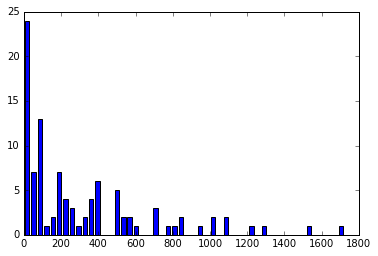

In [38]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

hist, bins = np.histogram(non_planar_errors, bins=50)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

In [73]:
# GD(self, training_data, epochs, learning_rate, test_data=None):
#ae.GD(N_Planar_Data, 1000, 0.1, N_Planar_Data)

In [152]:
#print(ae.costs)
errors = np.asarray(ae.costs)
errors = errors.reshape(50,3)
x_error_n_planar = errors[0:49,0]
y_error_n_planar = errors[0:49,1]
z_error_n_planar = errors[0:49,2]
x_error_n_planar

import matplotlib.pyplot as plt
plt.plot(y_error_n_planar)
plt.ylabel('non_planar_error_y')
plt.show()

In [149]:
#print(ae.costs)
#errors = np.asarray(ae.costs)
#errors = errors.reshape(50,3)
#x_error_planar = errors[0:49,0]
#y_error_planar = errors[0:49,1]
#z_error_planar = errors[0:49,2]
import matplotlib.pyplot as plt
plt.plot(y_error_planar)
plt.ylabel('planar_errors_y')
plt.show()

In [71]:
output = ae.reconstruct(Data)

In [81]:
input_curve_x = [ points_3d.ravel()[0] for points_3d in Data]
input_curve_y = [ points_3d.ravel()[1] for points_3d in Data]
input_curve_z = [ points_3d.ravel()[2] for points_3d in Data]

[-0.77017000000000013,
 -0.81369503596311277,
 -0.840306142859225,
 -0.85147768045103189,
 -0.84868400850122783,
 -0.83339948677250697,
 -0.80709847502756438,
 -0.77125533302909399,
 -0.72734442053979098,
 -0.67684009732234907,
 -0.6212167231394633,
 -0.56194865775382818,
 -0.500510260928138,
 -0.43837589242508762,
 -0.37701991200737106,
 -0.31791667943768337,
 -0.26254055447871871,
 -0.21236589689317165,
 -0.16886706644373672,
 -0.13351842289310864,
 -0.10747338571352945,
 -0.090297042857256038,
 -0.081064012547031744,
 -0.078848771302241383,
 -0.082725795642269923,
 -0.091769562086502124,
 -0.10505454715432304,
 -0.12165522736511739,
 -0.14064607923827013,
 -0.16110157929316629,
 -0.18209620404919047,
 -0.20270443002572774,
 -0.22200073374216292,
 -0.23905959171788088,
 -0.25295548047226657,
 -0.26277325426415526,
 -0.2680601448268472,
 -0.26900054365732984,
 -0.26582530693716716,
 -0.25876529084792327,
 -0.24805135157116232,
 -0.23391434528844834,
 -0.2165851281813454,
 -0.196294556

In [83]:
output_curve_x = [ points_3d.ravel()[0] for points_3d in output]
output_curve_y = [ points_3d.ravel()[1] for points_3d in output]
output_curve_z = [ points_3d.ravel()[2] for points_3d in output]

In [ ]:
# reconstruct the curve
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')  
ax.plot(input_curve_x, input_curve_y, input_curve_z, 'r--')
ax.plot(output_curve_x, output_curve_y, output_curve_z, 'b--')
#ax.plot(np.clip(output_curve[0], min[0], max[0]), np.clip(output_curve[1], min[1], max[1]), np.clip(output_curve[2], min[2], max[2]), 'bo')
plt.show()